**Imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import random
import os
import cv2
import time
import math

**File loading and dataset creating set-up**

In [2]:
TRAIN_IMG_DIR = 'C:/Users/tomwr/Datasets/Image/rail_faults/train'
VALID_IMG_DIR = 'C:/Users/tomwr/Datasets/Image/rail_faults/valid'
TEST_IMG_DIR = 'C:/Users/tomwr/Datasets/Image/rail_faults/test'

IMG_DIM = 224

LABELS = ['Defective', 'Non_defective']

**Create Training, Validation, Testing datasets functions**

In [3]:
def create_training_dataset(directory):
    
    train_data = []
    for label in LABELS:
        path = os.path.join(directory, label)
        label_no = LABELS.index(label)
    
        for image in os.listdir(path):
            images = cv2.imread(os.path.join(path, image), cv2.IMREAD_COLOR)
            resized_images = cv2.resize(images, (IMG_DIM, IMG_DIM), cv2.INTER_AREA) # Ensure images are all 224 x 224
            train_data.append([resized_images, label_no])
    
    random.shuffle(train_data)
    return train_data


def create_validation_dataset(directory):
    
    validation_data = []
    for label in LABELS:
        path = os.path.join(directory, label)
        label_no = LABELS.index(label)
    
        for image in os.listdir(path):
            images = cv2.imread(os.path.join(path, image), cv2.IMREAD_COLOR)
            resized_images = cv2.resize(images, (IMG_DIM, IMG_DIM), cv2.INTER_AREA) # Ensure images are all 224 x 224
            validation_data.append([resized_images, label_no])
    
    random.shuffle(validation_data)
    return validation_data


def create_testing_dataset(directory):
    
    test_data = []
    for label in LABELS:
        path = os.path.join(directory, label)
        label_no = LABELS.index(label)
    
        for image in os.listdir(path):
            images = cv2.imread(os.path.join(path, image), cv2.IMREAD_COLOR)
            resized_images = cv2.resize(images, (IMG_DIM, IMG_DIM), cv2.INTER_AREA) # Ensure images are all 224 x 224
            test_data.append([resized_images, label_no])
    
    random.shuffle(test_data)
    return test_data

**Create datasets using above functions**

In [4]:
train_data = create_training_dataset(TRAIN_IMG_DIR)
valid_data = create_validation_dataset(VALID_IMG_DIR)
test_data = create_testing_dataset(TEST_IMG_DIR)

In [5]:
train_data = np.array(train_data)
valid_data = np.array(valid_data)
test_data = np.array(test_data)

C:\Users\tomwr\AppData\Local\Temp\ipykernel_2452\1335006547.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_data = np.array(train_data)
C:\Users\tomwr\AppData\Local\Temp\ipykernel_2452\1335006547.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  valid_data = np.array(valid_data)
C:\Users\tomwr\AppData\Local\Temp\ipykernel_2452\1335006547.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to 

**Split datasets into features and labels**

In [6]:
X_train = []
y_train = []

X_val = []
y_val = []

X_test = []
y_test = []

for features, label in train_data:
    X_train.append(features)
    y_train.append(label)
X_train = np.array(X_train)
X_train = X_train / 255.0
y_train = np.array(y_train)
    
for features, label in valid_data:
    X_val.append(features)
    y_val.append(label)
X_val = np.array(X_val)
X_val = X_val / 255.0
y_val = np.array(y_val)

for features, label in test_data:
    X_test.append(features)
    y_test.append(label)
X_test = np.array(X_test)
X_test = X_test / 255.0
y_test = np.array(y_test)
    
X_train = np.array(X_train).reshape(-1, IMG_DIM, IMG_DIM, 3)
X_val = np.array(X_val).reshape(-1, IMG_DIM, IMG_DIM, 3)
X_test = np.array(X_test).reshape(-1, IMG_DIM, IMG_DIM, 3)

print(X_train.shape)
print(y_train.shape)

(300, 224, 224, 3)
(300,)


**Create training graph plot function**

In [8]:
def plot_training_metrics(name, history):
    history_df = pd.DataFrame(history.history)
    
    x_axis = np.arange(0, len(history_df) + 1, 1) # x-axis, 0 - max epochs, intervals of 1.
    plt.figure(1, (16, 16))
    plt.suptitle(f'{name} metrics')
    
    #Metrics = Loss (binary crossentropy), accuracy, AUC ROC, AUC PR
    plt.subplot(2, 2, 1)
    plt.title('Loss')
    plt.plot(history_df['loss'], label = 'loss')
    plt.plot(history_df['val_loss'], label = 'validation loss')
    plt.xlabel('epoch')
    plt.legend()
    
    plt.subplot(2, 2, 2)
    plt.title('Accuracy')
    plt.plot(history_df['binary_accuracy'], label = 'binary accuracy')
    plt.plot(history_df['val_binary_accuracy'], label = 'validation binary accuracy')
    plt.xlabel('epoch')
    plt.legend()
    
    plt.subplot(2, 2, 3)
    plt.title('AUC Receiver Operating Curve (ROC)')
    plt.plot(history_df['auc_roc'], label = 'AUC ROC')
    plt.plot(history_df['val_auc_roc'], label = 'validation AUC ROC')
    plt.xlabel('epoch')
    plt.legend()
    
    plt.subplot(2, 2, 4)
    plt.title('AUC Precision Recall (PR)')
    plt.plot(history_df['auc_pr'], label = 'AUC PR')
    plt.plot(history_df['val_auc_pr'], label = 'validation AUC PR')
    plt.xlabel('epoch')
    plt.legend()
    
    plt.show()

**Keras model layers imports**

In [9]:
from keras.models import Sequential
from keras.metrics import Accuracy, BinaryCrossentropy, AUC, BinaryAccuracy
from keras.layers import Conv2D, BatchNormalization, Dropout, MaxPooling2D, Dense, Flatten
from keras.losses import BinaryCrossentropy
from keras.layers.activation import *
from keras.optimizers import *

auc_roc = AUC(curve = 'roc', name = 'auc_roc')
auc_pr = AUC(curve = 'pr', name = 'auc_pr')

**Baseline simple model**

In [10]:
bsm_epochs = 10
bsm_layers = 2
bsm_units  = 32
bsm_kernel = 3

bsm_name = f'bsm_{bsm_units}_{bsm_layers}_{bsm_epochs}_{time.time()}'

bsm = Sequential([
    Conv2D(input_shape = [IMG_DIM, IMG_DIM, 3],
           filters = bsm_units,
           padding = 'same',
           kernel_size = (5, 5)),
    ReLU(),
    Conv2D(filters = bsm_units,
           padding = 'same',
           kernel_size = (bsm_kernel, bsm_kernel)),
    Flatten(),
    
    Dense(units = bsm_units),
    ReLU(),
    Dense(units = 1, activation = 'sigmoid'),
    ])

bsm.compile(loss = BinaryCrossentropy(),
            optimizer = Adam(),
            metrics = [BinaryCrossentropy(), BinaryAccuracy(), auc_roc, auc_pr])

#bsm_hist = bsm.fit(X_train, y_train,
                   #validation_data = (X_val, y_val),
                   #epochs = bsm_epochs)

#plot_training_metrics(bsm_name, bsm_hist)

**Image Generator creation, dataset modification for a mobilenet**

In [11]:
from keras.applications import MobileNetV2
from keras.applications.mobilenet_v2 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(
    horizontal_flip = True,
    vertical_flip = False,
    rotation_range = 0.1,
    shear_range = 0.1,
    brightness_range = [0, 0.1]
)

validation_generator = ImageDataGenerator()

train_generator.fit(X_train)
validation_generator.fit(X_val)

#

mnv2_X_train = preprocess_input(X_train * 255.0)
mnv2_X_val = preprocess_input(X_val * 255.0)
mnv2_X_test = preprocess_input(X_test * 255.0)

mnv2_train_generator = ImageDataGenerator(
    horizontal_flip = True,
    rotation_range = 0.1,
    shear_range = 0.1,
    brightness_range = [0, 0.1]
)

mnv2_val_generator = ImageDataGenerator()

mnv2_train_generator.fit(mnv2_X_train)
mnv2_val_generator.fit(mnv2_X_val)

**Try image data generator on baseline model -- 'ibsm'**

In [10]:
ibsm_name = f'ibsm_{bsm_units}_{bsm_layers}_{bsm_epochs}_{time.time()}'

ibsm_hist = bsm.fit(train_generator.flow(X_train, y_train,
                                         batch_size = 32),
                                         validation_data = validation_generator.flow(X_val, y_val,
                                                                              batch_size = 32),
                    steps_per_epoch = len(X_train) / 32,
                    epochs = bsm_epochs
                   )

plot_training_metrics(ibsm_name, ibsm_hist)
                    
                    

NameError: name 'bsm_units' is not defined

**Fully frozen MobileNetV2 with Unaugmented data**

In [ ]:
frozen_mnv2 = MobileNetV2(input_shape = (224, 224, 3),
                          include_top = False,
                          alpha = 1.0)

for layer in frozen_mnv2.layers:
    layer.trainable = False
    

frozen_mnv2_epochs = 10
frozen_mnv2_dense = 32
frozen_mnv2_name = f'frozen_mnv2_{frozen_mnv2_epochs}_{frozen_mnv2_dense}_{time.time()}'

frozen_mnv2_model = Sequential([frozen_mnv2,
                                Flatten(),
                                BatchNormalization(),
                                Dense(frozen_mnv2_dense, kernel_initializer = 'he_normal'),
                                ReLU(),
                                Dense(1, activation = 'sigmoid')
                               ])

frozen_mnv2_model.compile(loss = BinaryCrossentropy(),
                          optimizer = Adam(),
                          metrics = [BinaryCrossentropy(), BinaryAccuracy(), auc_roc, auc_pr]
                         )

frozen_mnv2_model_hist = frozen_mnv2_model.fit(mnv2_X_train, y_train,
                                               validation_data = (mnv2_X_val, y_val),
                                               epochs = frozen_mnv2_epochs)


plot_training_metrics(frozen_mnv2_name, frozen_mnv2_model_hist)         

**Percentage unfrozen mnv2 with unaugmented data**

Epoch 1/10
10/10 [==============================] - 9s 596ms/step - loss: 1.2175 - binary_crossentropy: 0.6798 - binary_accuracy: 0.6667 - auc_roc: 0.7604 - auc_pr: 0.7590 - val_loss: 4.9681 - val_binary_crossentropy: 4.3621 - val_binary_accuracy: 0.6290 - val_auc_roc: 0.6665 - val_auc_pr: 0.6000
Epoch 2/10
10/10 [==============================] - 5s 459ms/step - loss: 0.8453 - binary_crossentropy: 0.1974 - binary_accuracy: 0.9400 - auc_roc: 0.9929 - auc_pr: 0.9921 - val_loss: 2.7401 - val_binary_crossentropy: 2.0633 - val_binary_accuracy: 0.6452 - val_auc_roc: 0.7716 - val_auc_pr: 0.6990
Epoch 3/10
10/10 [==============================] - 4s 447ms/step - loss: 0.8209 - binary_crossentropy: 0.1410 - binary_accuracy: 0.9833 - auc_roc: 0.9995 - auc_pr: 0.9995 - val_loss: 2.0449 - val_binary_crossentropy: 1.3904 - val_binary_accuracy: 0.6774 - val_auc_roc: 0.8241 - val_auc_pr: 0.7671
Epoch 4/10
10/10 [==============================] - 4s 443ms/step - loss: 0.7369 - binary_crossentropy: 0.

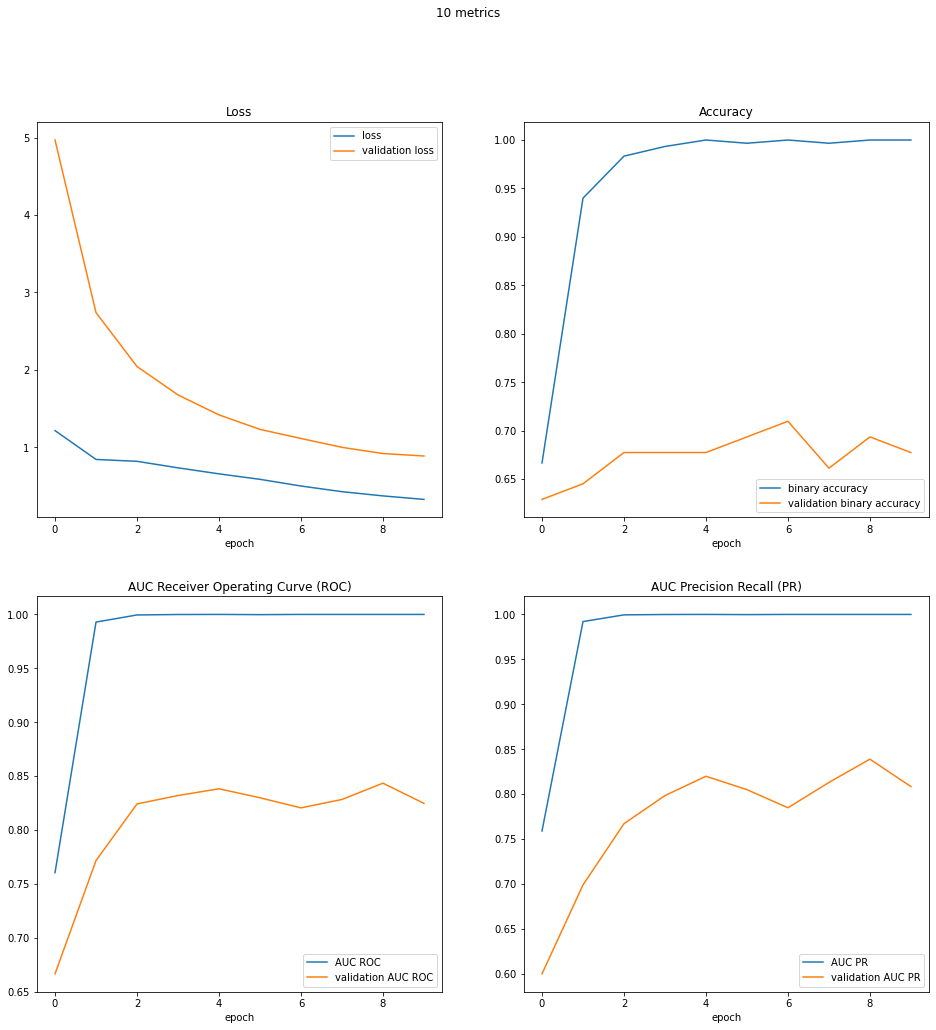

In [12]:
pct_unfrozen_mnv2 = MobileNetV2(input_shape = (224, 224, 3),
                                include_top = False,
                                alpha = 1.0)
pct_unfrozen = 0.01
no_unfrozen_layers = math.ceil(len(pct_unfrozen_mnv2.layers) * pct_unfrozen) # ceil round up to nearest whole number.

#Freeze all layers first.
for layer in pct_unfrozen_mnv2.layers:
    layer.trainable = False
    
#Unfreeze no_unfrozen_layers from end.
for layer in pct_unfrozen_mnv2.layers[-no_unfrozen_layers:]:
    layer.trainable = True

pct_unfrozen_mnv2_epochs = 10
pct_unfrozen_mnv2_dense = 24
pct_unfrozen_mnv2_name = f'{pct_unfrozen * 100}pct_unfrozen_mnv2_{pct_unfrozen_mnv2_epochs}_{pct_unfrozen_mnv2_dense}'

pct_unfrozen_mnv2_model = Sequential([pct_unfrozen_mnv2,
                                      Flatten(),
                                      BatchNormalization(),
                                      Dense(pct_unfrozen_mnv2_dense, kernel_initializer = 'he_normal', kernel_regularizer = 'l2'),
                                      ReLU(),
                                      BatchNormalization(),
                                      Dense(1, activation = 'sigmoid')
                                     ])

pct_unfrozen_mnv2_model.compile(loss = BinaryCrossentropy(),
                                optimizer = Adam(),
                                metrics = [BinaryCrossentropy(), BinaryAccuracy(), auc_roc, auc_pr])

pct_unfrozen_mnv2_hist = pct_unfrozen_mnv2_model.fit(mnv2_X_train, y_train,
                                                     validation_data = (mnv2_X_val, y_val),
                                                     epochs = pct_unfrozen_mnv2_epochs
                                                    )

plot_training_metrics(pct_unfrozen_mnv2_epochs, pct_unfrozen_mnv2_hist)

**Percentage unfrozen mnv2 with augmented data**

Epoch 1/10
9/9 [==============================] - 9s 822ms/step - loss: 1.1607 - binary_crossentropy: 0.8185 - binary_accuracy: 0.6833 - auc_roc: 0.7332 - auc_pr: 0.7236 - val_loss: 0.9885 - val_binary_crossentropy: 0.5857 - val_binary_accuracy: 0.7581 - val_auc_roc: 0.7966 - val_auc_pr: 0.8278
Epoch 2/10
9/9 [==============================] - 6s 638ms/step - loss: 1.0070 - binary_crossentropy: 0.5308 - binary_accuracy: 0.7367 - auc_roc: 0.8106 - auc_pr: 0.8130 - val_loss: 1.3957 - val_binary_crossentropy: 0.8792 - val_binary_accuracy: 0.7097 - val_auc_roc: 0.7716 - val_auc_pr: 0.8127
Epoch 3/10
9/9 [==============================] - 6s 629ms/step - loss: 0.9242 - binary_crossentropy: 0.4082 - binary_accuracy: 0.8200 - auc_roc: 0.8995 - auc_pr: 0.9045 - val_loss: 1.3854 - val_binary_crossentropy: 0.8629 - val_binary_accuracy: 0.6935 - val_auc_roc: 0.7451 - val_auc_pr: 0.7948
Epoch 4/10
9/9 [==============================] - 6s 641ms/step - loss: 0.8530 - binary_crossentropy: 0.3432 - b

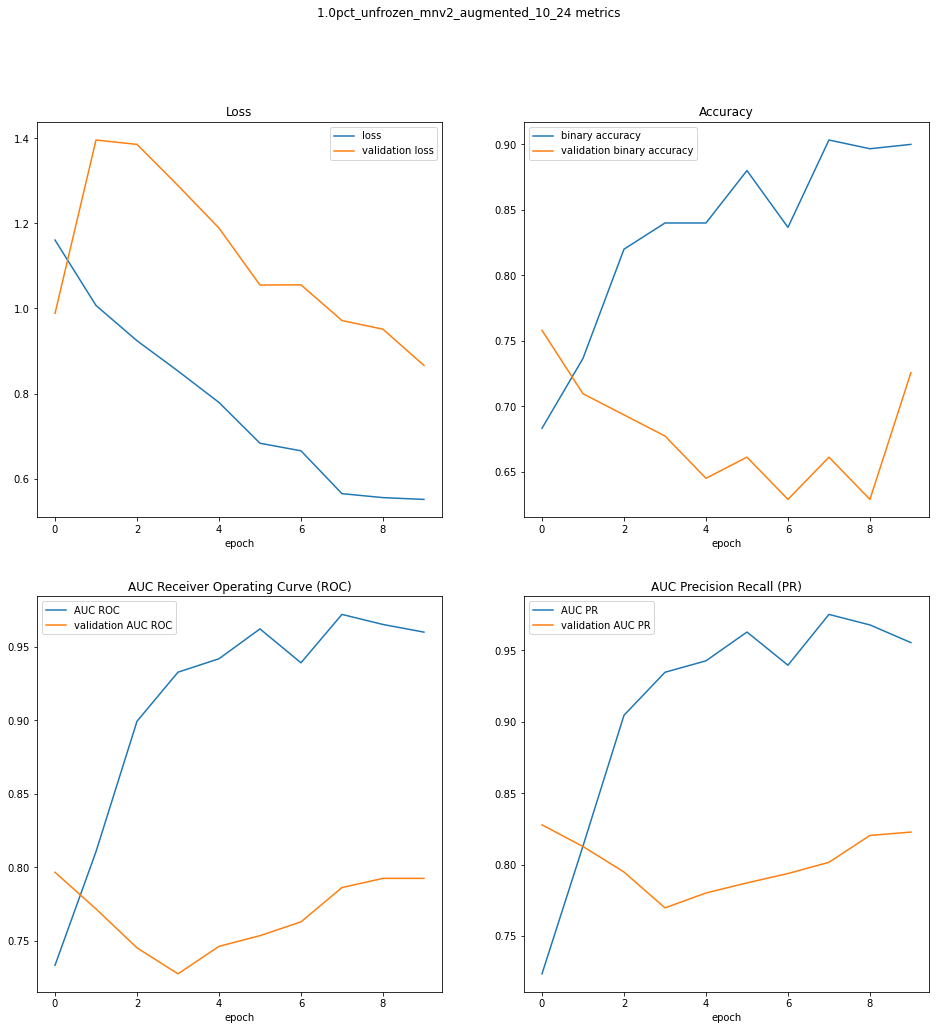

In [12]:
#Using model and variables from above cell
pct_unfrozen_mnv2_aug_name = f'{pct_unfrozen * 100}pct_unfrozen_mnv2_augmented_{pct_unfrozen_mnv2_epochs}_{pct_unfrozen_mnv2_dense}'

pct_unfrozen_mnv2_aug_hist = pct_unfrozen_mnv2_model.fit(train_generator.flow(mnv2_X_train, y_train),
                                                         validation_data = validation_generator.flow(mnv2_X_val, y_val),
                                                         steps_per_epoch = len(mnv2_X_train) / 32,
                                                         epochs = pct_unfrozen_mnv2_epochs
                                                        )

plot_training_metrics(pct_unfrozen_mnv2_aug_name, pct_unfrozen_mnv2_aug_hist)

**Create some callbacks to improve model performance (hopefully!)**

In [13]:
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.callbacks import LearningRateScheduler
from keras.callbacks import CSVLogger

best_weights_cb = ModelCheckpoint(monitor = 'val_loss',
                                  save_weights_only = True,
                                  save_best_only = False,
                                 filepath = 'C:/Users/tomwr/Coding/image_classification/rail_defect/model_checkpoints')

early_stopping_10_cb = EarlyStopping(monitor = 'val_loss',
                                  patience = 10)

halving_lr_on_plateau_cb = ReduceLROnPlateau(monitor = 'val_loss',
                                            patience = 3,
                                            factor = 0.5)

early_stopping_5_cb = EarlyStopping(monitor = 'val_loss',
                                    patience = 5)

#Learning rate schedules##############################################

#Exponentially decreasing 
def exp_decrease_lr(lr, epoch):
    return lr * tf.math.exp(-0.1)
exp_decrease_ls = LearningRateScheduler(exp_decrease_lr)

#Exponentially decreasing after 5 epochs
def exp_decrease_lr_5(lr, epoch):
    if epoch <= 5:
        return lr
    else:
        return lr * tf.math.exp(-0.1)
exp_decrease_5_ls = LearningRateScheduler(exp_decrease_lr_5)

#Stepped - Halving learning rate every 5 epochs - currently not working
def halving_lr(lr, epoch):
    if epoch % 5 == 0:
        lr = lr * 0.5
    else:
        return lr
halving_stepped_ls = LearningRateScheduler(halving_lr)

**Percentage unfrozen with unaugmented data -- With extra regularization and callbacks**

Epoch 1/60
10/10 [==============================] - 10s 589ms/step - loss: 61.5648 - binary_crossentropy: 0.6100 - binary_accuracy: 0.6833 - auc_roc: 0.7594 - auc_pr: 0.7572 - val_loss: 34.8310 - val_binary_crossentropy: 3.3868 - val_binary_accuracy: 0.5968 - val_auc_roc: 0.6696 - val_auc_pr: 0.6032 - lr: 0.0010
Epoch 2/60
10/10 [==============================] - 4s 444ms/step - loss: 24.8829 - binary_crossentropy: 0.3872 - binary_accuracy: 0.8133 - auc_roc: 0.9064 - auc_pr: 0.9134 - val_loss: 18.6539 - val_binary_crossentropy: 0.5541 - val_binary_accuracy: 0.7742 - val_auc_roc: 0.8179 - val_auc_pr: 0.8236 - lr: 0.0010
Epoch 3/60
10/10 [==============================] - 4s 444ms/step - loss: 17.2085 - binary_crossentropy: 0.4142 - binary_accuracy: 0.8200 - auc_roc: 0.8963 - auc_pr: 0.8844 - val_loss: 15.3963 - val_binary_crossentropy: 0.5046 - val_binary_accuracy: 0.7419 - val_auc_roc: 0.8533 - val_auc_pr: 0.8458 - lr: 0.0010
Epoch 4/60
10/10 [==============================] - 4s 451ms

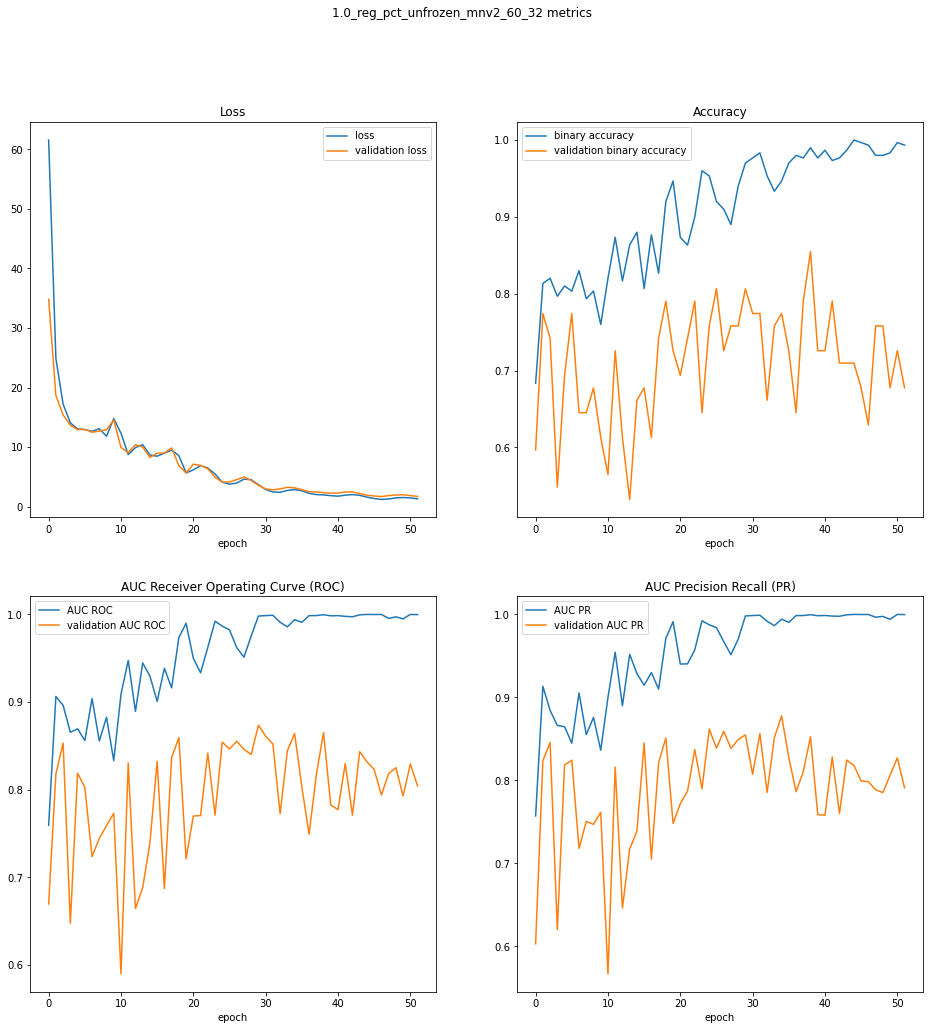

In [14]:
reg_pct_unfrozen_mnv2_epochs = 60
reg_pct_unfrozen_mnv2_dense = 32

reg_pct_unfrozen_mnv2_name = f'{pct_unfrozen * 100}_reg_pct_unfrozen_mnv2_{reg_pct_unfrozen_mnv2_epochs}_{reg_pct_unfrozen_mnv2_dense}'

reg_pct_unfrozen_mnv2_model = Sequential([pct_unfrozen_mnv2,
                                          Flatten(),
                                          BatchNormalization(),
                                          Dense(reg_pct_unfrozen_mnv2_dense, kernel_initializer = 'he_normal', kernel_regularizer = 'l1_l2'),
                                          ReLU(),
                                          BatchNormalization(),
                                          Dropout(0.25),
                                          Dense(reg_pct_unfrozen_mnv2_dense, kernel_initializer = 'he_normal', kernel_regularizer = 'l2'),
                                          ReLU(),
                                          BatchNormalization(),
                                          Dense(1, activation = 'sigmoid')
                                         ])

reg_pct_unfrozen_mnv2_model.compile(loss = BinaryCrossentropy(),
                                    optimizer = Adam(),
                                    metrics = [BinaryCrossentropy(), BinaryAccuracy(), auc_roc, auc_pr])

reg_pct_unfrozen_mnv2_hist = reg_pct_unfrozen_mnv2_model.fit(mnv2_X_train, y_train,
                                                             validation_data = (mnv2_X_val, y_val),
                                                             epochs = reg_pct_unfrozen_mnv2_epochs,
                                                             callbacks = [halving_lr_on_plateau_cb, early_stopping_5_cb])

plot_training_metrics(reg_pct_unfrozen_mnv2_name, reg_pct_unfrozen_mnv2_hist)

In [15]:
#Evaluate final model.
reg_pct_unfrozen_mnv2_model.evaluate(X_test, y_test, return_dict = True)

1/1 [==============================] - 0s 278ms/step - loss: 1.7710 - binary_crossentropy: 0.6135 - binary_accuracy: 0.7273 - auc_roc: 0.7851 - auc_pr: 0.7899


{'loss': 1.770979404449463,
 'binary_crossentropy': 0.6135381460189819,
 'binary_accuracy': 0.7272727489471436,
 'auc_roc': 0.7851240038871765,
 'auc_pr': 0.7898713946342468}